In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import random

A = 1
T = 1
sample_rate = 100
num_random_processes = 1000
E_N0 = np.arange(-10, 20, 1)

In [2]:
def receiver_filter(rt, which):
    if which == 1:
        gt = np.fromfunction(lambda i: ((0*sample_rate < i) & (i <= T*sample_rate))*A, (sample_rate+10,)).astype(np.float)
        return signal.convolve(rt,gt)/sample_rate
    elif which == 2:
        return rt
    else:
        ht = np.fromfunction(lambda i: ((0*sample_rate < i) & (i <= T*sample_rate))*((i/sample_rate)*np.sqrt(3))/T, (sample_rate+10,)).astype(np.float)
        return signal.convolve(rt, ht)/sample_rate  

In [3]:
def random_pulse():
    return A if random.getrandbits(1) == 1 else -A

In [4]:
def calc_N0(avg_powerDB):
    return ((A**2)*(T*sample_rate))/(10**(avg_powerDB/10))

In [5]:
def add_AWGN(gt, avg_powerDB):
    N0 = calc_N0(avg_powerDB)
    AWGN = np.random.normal(0, N0/2, sample_rate+10)
    return gt+AWGN

In [6]:
def sample_at_T(yt):
    return yt[T*sample_rate]

In [7]:
def mak_decision(y):
    return A if y >= 0 else -A

In [8]:
def calc_prob_error(num_random_processes, avg_powerDB, which_filter):
    num_wrong_decisions = 0
    for _ in range(num_random_processes):
        magnitude = random_pulse()
        gt = np.fromfunction(lambda i: ((0*sample_rate < i) & (i <= T*sample_rate))*magnitude, (sample_rate+10,)).astype(np.float)
        rt = add_AWGN(gt, avg_powerDB)
        yt = receiver_filter(rt, which_filter)
        yT = sample_at_T(yt)
        out = mak_decision(yT)
        if (out == A and magnitude == -A) or (out == -A and magnitude == A):
            num_wrong_decisions += 1
    return num_wrong_decisions/num_random_processes

In [9]:
def plot_out(avg_powerDB):
    gt = np.fromfunction(lambda i: ((0*sample_rate < i) & (i <= T*sample_rate))*A,
                         (sample_rate+10,)).astype(np.float)
    rt = add_AWGN(gt, avg_powerDB)
    yt1 = receiver_filter(rt, 1)
    yt2 = receiver_filter(rt, 2)
    yt3 = receiver_filter(rt, 3)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
    fig.suptitle("output of receive filters with AWGN with (E/N0 = {})".format(avg_powerDB))
    
    ax1.plot(np.stack((yt1,), axis=1))
    ax1.set_title("filter 1")
    ax1.set(xlabel='time', ylabel='y(t)')
    
    ax2.plot(np.stack((yt2,), axis=1))
    ax2.set_title("filter 2")
    ax2.set(xlabel='time', ylabel='y(t)')
    
    ax3.plot(np.stack((yt3,), axis=1))
    ax3.set_title("filter 3")
    ax3.set(xlabel='time', ylabel='y(t)')
     
    plt.show()

In [10]:
def calc_prob_all(avg_powerDB):
    prob1 = calc_prob_error(num_random_processes, avg_powerDB, 1)
    prob2 = calc_prob_error(num_random_processes, avg_powerDB, 2)
    prob3 = calc_prob_error(num_random_processes, avg_powerDB, 3)
    print("probability of error of receive filter1 with avg_power = {} db is {}".format(avg_powerDB, prob1))
    print("probability of error of receive filter2 with avg_power = {} db is {}".format(avg_powerDB, prob2))
    print("probability of error of receive filter3 with avg_power = {} db is {}".format(avg_powerDB, prob3))

In [11]:
def prob_error_list(E_N0, which_filter):
    prob_error = []
    for each in E_N0:
        prob_error.append(calc_prob_error(num_random_processes, each, which_filter))
    return prob_error

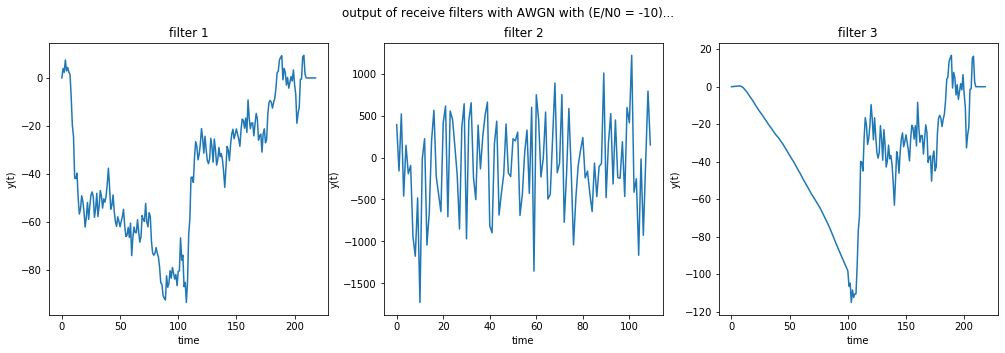

probability of error of receive filter1 with avg_power = -10 db is 0.508
probability of error of receive filter2 with avg_power = -10 db is 0.537
probability of error of receive filter3 with avg_power = -10 db is 0.479


In [12]:
plot_out(avg_powerDB= -10)
calc_prob_all(avg_powerDB= -10)

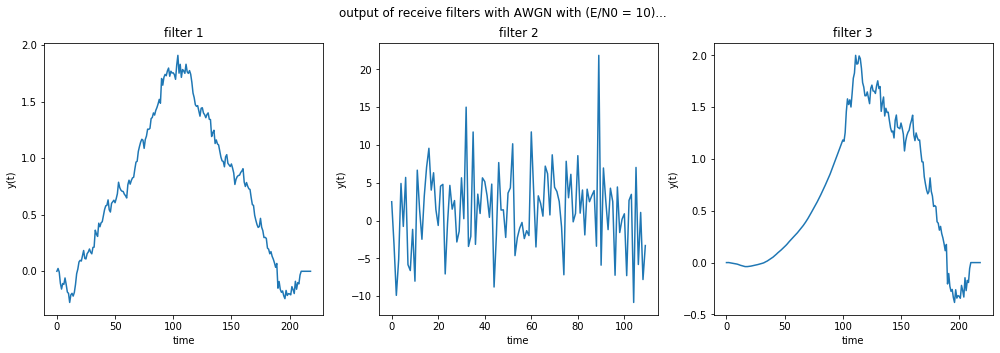

probability of error of receive filter1 with avg_power = 10 db is 0.031
probability of error of receive filter2 with avg_power = 10 db is 0.418
probability of error of receive filter3 with avg_power = 10 db is 0.037


In [13]:
plot_out(avg_powerDB= 10)
calc_prob_all(avg_powerDB= 10)

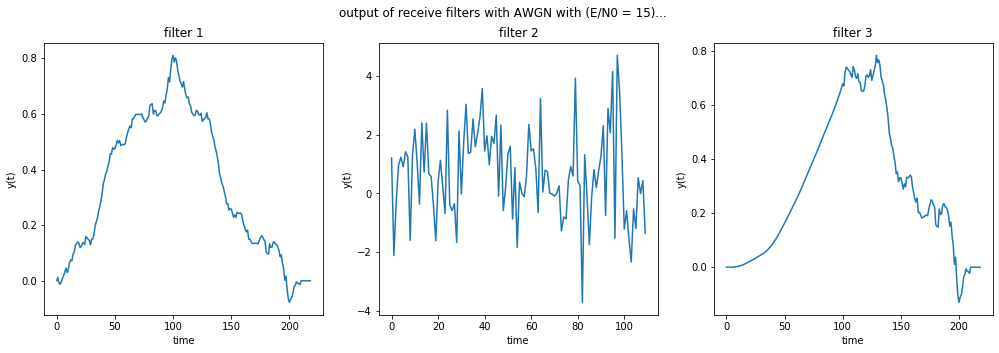

probability of error of receive filter1 with avg_power = 15 db is 0.0
probability of error of receive filter2 with avg_power = 15 db is 0.249
probability of error of receive filter3 with avg_power = 15 db is 0.0


In [14]:
plot_out(avg_powerDB= 15)
calc_prob_all(avg_powerDB= 15)

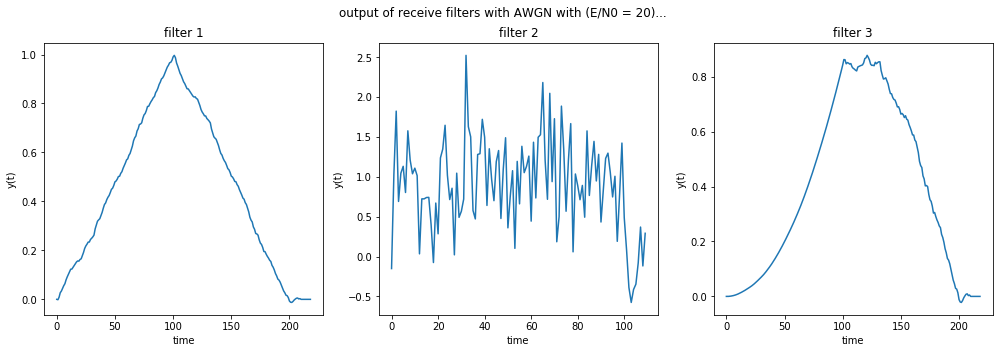

probability of error of receive filter1 with avg_power = 20 db is 0.0
probability of error of receive filter2 with avg_power = 20 db is 0.016
probability of error of receive filter3 with avg_power = 20 db is 0.0


In [15]:
plot_out(avg_powerDB= 20)
calc_prob_all(avg_powerDB= 20)

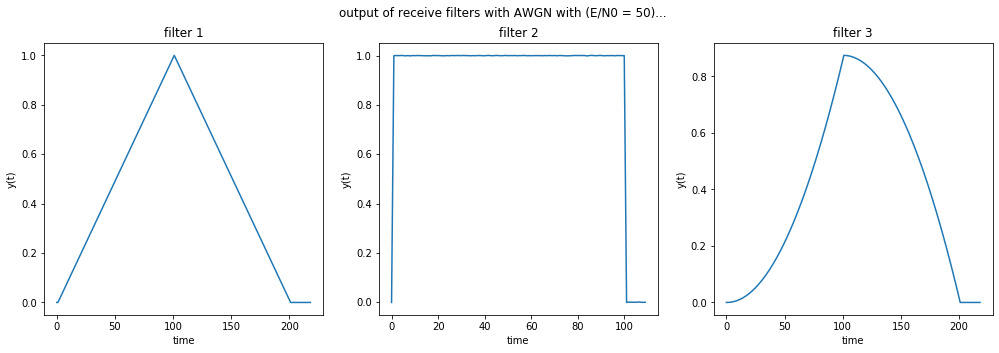

probability of error of receive filter1 with avg_power = 50 db is 0.0
probability of error of receive filter2 with avg_power = 50 db is 0.0
probability of error of receive filter3 with avg_power = 50 db is 0.0


In [16]:
plot_out(avg_powerDB= 50)
calc_prob_all(avg_powerDB= 50)

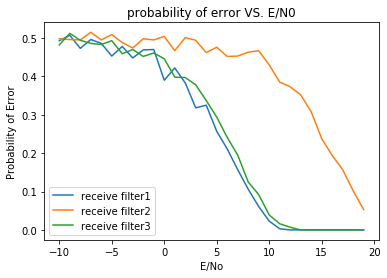

In [17]:
prob_error1 = prob_error_list(E_N0, 1)
prob_error2 = prob_error_list(E_N0, 2)
prob_error3 = prob_error_list(E_N0, 3)
plt.plot(E_N0, prob_error1, label='receive filter1')
plt.plot(E_N0, prob_error2, label='receive filter2')
plt.plot(E_N0, prob_error3, label='receive filter3')
plt.legend()
plt.title('probability of error VS. E/N0')
plt.xlabel('E/No')
plt.ylabel('Probability of Error')
plt.show()

# Question 1: Is BER increasing or decreasing with E/N0, and why ?

## Our answer:
As it is shown in the output, BER decreases while E/N0 is increasing. this beacause of, as long as E/N0 increases, N0 decreases and that means that the power of the noise becomes much smaller than the power of the pulse such that it cannot highly affect the pulse signal   


# Question 2: which has the lowest BER, and why ?

## Our answer:
As it is shown in the output, filter one has the lowset BER as it is a matched filter = g(T-t), proved in the lec that h(t)optimal = g(T-t) maximizes the SNR and minimizes BER.. simply why?! as the output of the convolution at T is the energy of the pulse so the BER is minimum.